In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing


In [108]:
AS = pd.read_csv('https://raw.githubusercontent.com/amankharwal/website-data/master/Advertising.csv')
AS

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [109]:
AS.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [110]:
AS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [111]:
AS.isna().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [112]:
AS.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [113]:
AS.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [114]:
AS.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [115]:
AS.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [116]:
AS.shape

(200, 5)

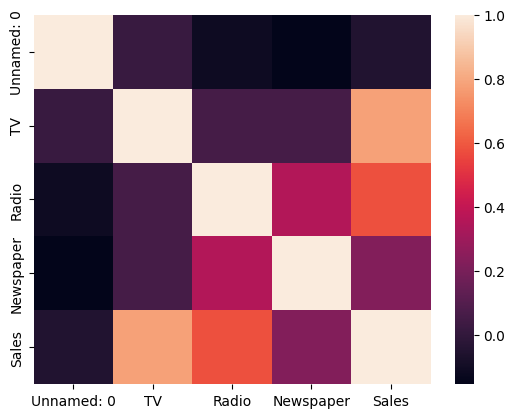

In [117]:
sns.heatmap(AS.corr(), cbar = True)
plt.show()

In [118]:

AS.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [119]:

AS['Newspaper'].value_counts()

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: Newspaper, Length: 172, dtype: int64

In [120]:
AS['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [121]:
AS['Radio'].value_counts()

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: Radio, Length: 167, dtype: int64

In [122]:
AS['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

<Axes: ylabel='Newspaper'>

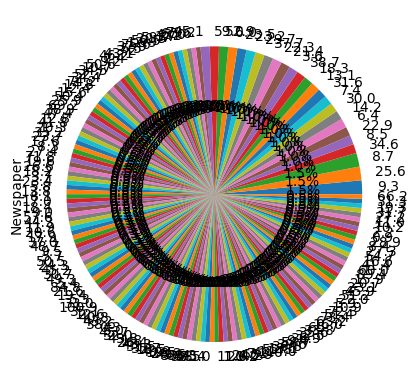

In [123]:
round(AS["Newspaper"].value_counts()/AS.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

<Axes: ylabel='TV'>

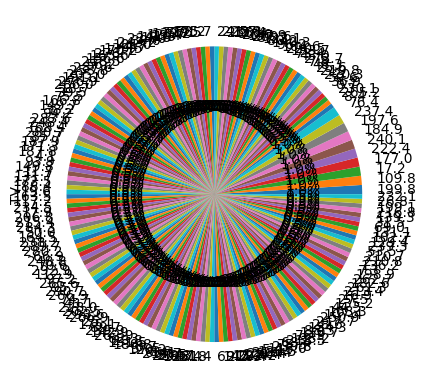

In [124]:

AS['TV'].value_counts()
round(AS["TV"].value_counts()/AS.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

In [125]:
AS.rename({'TV':'Television','Radio':'radio broadcasts'},axis=1, inplace=True)
AS.columns

Index(['Unnamed: 0', 'Television', 'radio broadcasts', 'Newspaper', 'Sales'], dtype='object')

In [126]:
df=AS[['Television','radio broadcasts']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Television        200 non-null    float64
 1   radio broadcasts  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [127]:
df['Television'].value_counts()


199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: Television, Length: 190, dtype: int64

In [128]:
df.corr()

,Television,radio broadcasts
Television,1.000000,0.054809
radio broadcasts,0.054809,1.000000


In [129]:
df['radio broadcasts'].mean()

23.264000000000006

In [130]:
AS

,Unnamed: 0,Television,radio broadcasts,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


C:\Users\Elfajr\AppData\Local\Temp\ipykernel_10784\1604232676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AS['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

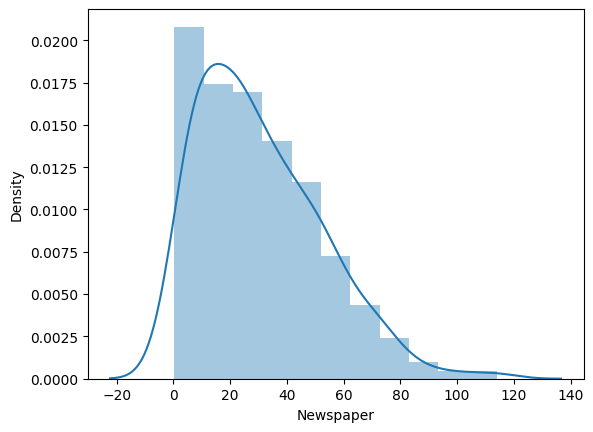

In [131]:

AS.head()
sns.distplot(AS['Newspaper'])

C:\Users\Elfajr\AppData\Local\Temp\ipykernel_10784\2915832237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AS['Television'],rug=True, hist=False)


<Axes: xlabel='Television', ylabel='Density'>

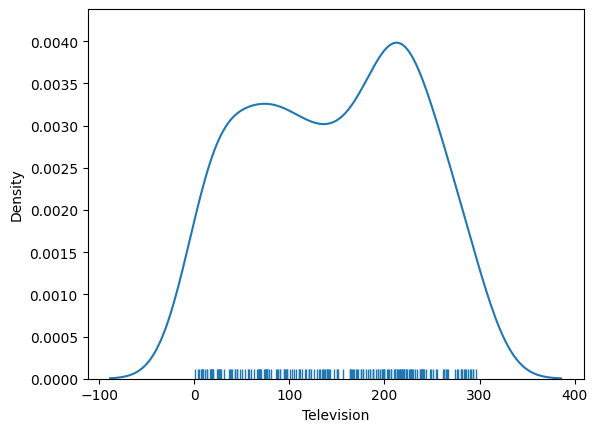

In [132]:
sns.distplot(AS['Television'],rug=True, hist=False)

<Axes: ylabel='count'>

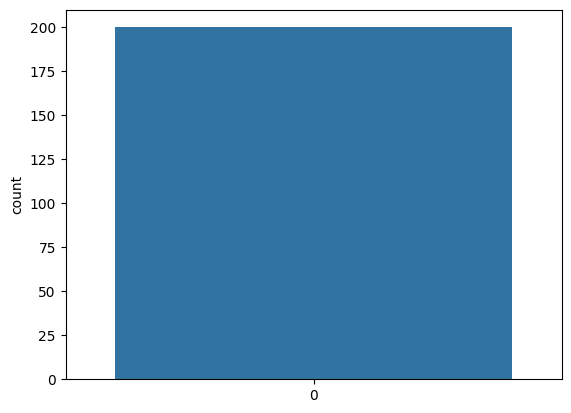

In [133]:
sns.countplot(AS['Unnamed: 0'])


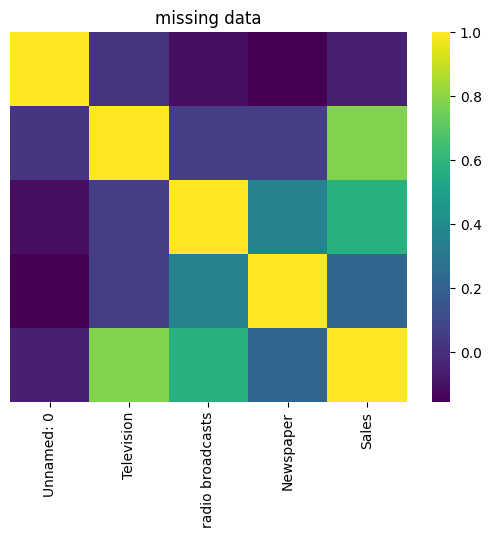

In [134]:
AS.isnull().sum()
sns.heatmap(AS.corr(),cmap='viridis',cbar=True,yticklabels=False)
plt.title('missing data')
plt.show()

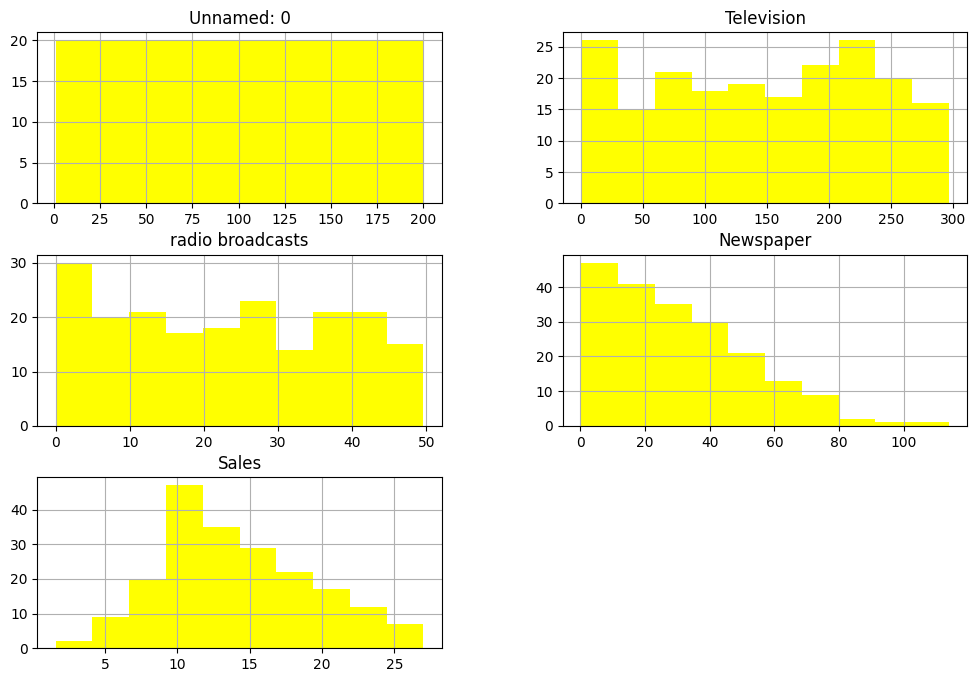

In [135]:
AS.hist(bins=10 , figsize=(12,8), color = 'Yellow')
plt.show()

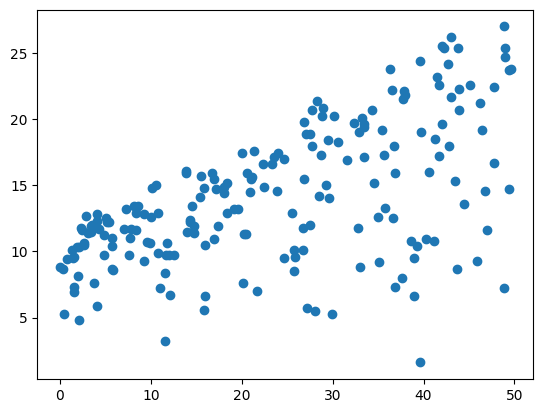

In [136]:

plt.scatter(AS['radio broadcasts'],AS['Sales'])

c:\Users\Elfajr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


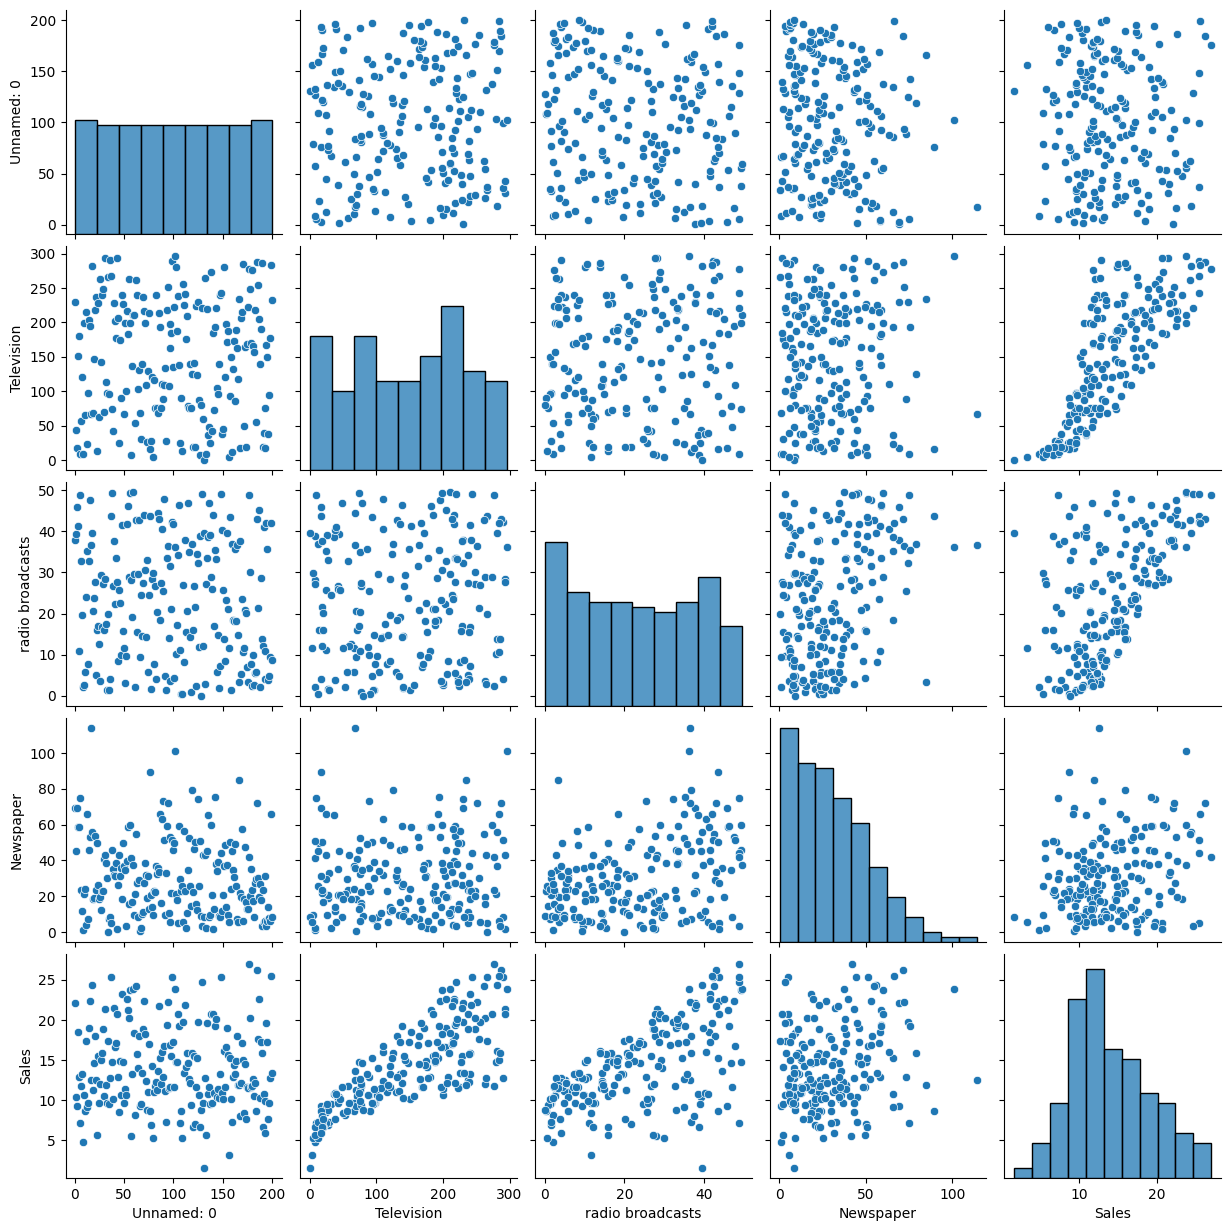

In [137]:

sns.pairplot(AS, size=2.5)
plt.show()

In [138]:

X = AS.iloc[:, :-1].values
y = AS.iloc[:, -1].values
model = LinearRegression().fit(X, y)

In [139]:
model.coef_

array([-0.00057983,  0.04577592,  0.18838318, -0.00124333])

In [140]:
model.intercept_

3.005209420097845

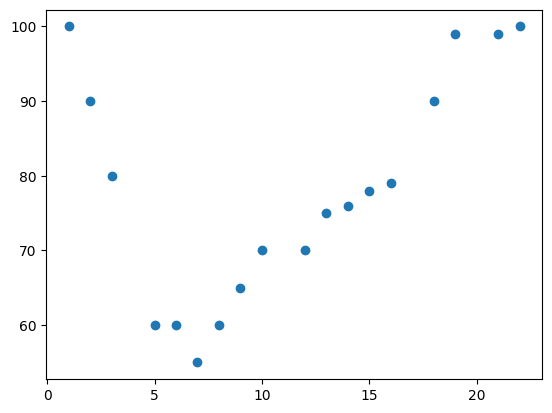

In [141]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

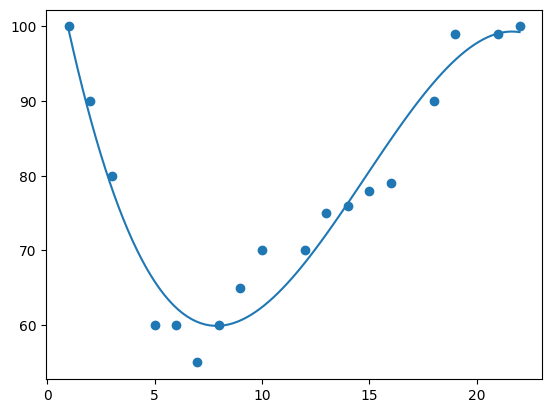

In [142]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [143]:
speed = mymodel(17)
print(speed)

88.8733126969799


In [144]:
AS

,Unnamed: 0,Television,radio broadcasts,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [145]:

X = AS.iloc[:, :-1].values
y = AS.iloc[:, -1].values


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

In [147]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


In [148]:
model = LinearRegression().fit(X_train, y_train)


In [149]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

3.1990044685888988

In [150]:

alphas = [0.1, 1, 10]
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
best_alpha


10.0

In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Ypred_con_scaled = scaler.fit_transform(AS)
Ypred_con_scaled

array([[0.        , 0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.00502513, 0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.01005025, 0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.01507538, 0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.0201005 , 0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02512563, 0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.03015075, 0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.03517588, 0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.04020101, 0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.04522613, 0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.05025126, 0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.05527638, 0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.06030151, 0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.06532663, 0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.07035176, 0.68785932, 0.

In [152]:
x = AS.iloc[:,:1].values
y = AS.iloc[:,-1].values

In [153]:
print(f"x = \n{x}")

x = 
[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 

In [154]:
print(f"y = \n{y}")

y = 
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  

In [155]:
model = preprocessing.MinMaxScaler()
scaledData = model.fit_transform(AS.values)
scaledData = pd.DataFrame(scaledData, columns=AS.columns)    
print(f"scalling to data = \n", scaledData)

scalling to data = 
      Unnamed: 0  Television  radio broadcasts  Newspaper     Sales
0      0.000000    0.775786          0.762097   0.605981  0.807087
1      0.005025    0.148123          0.792339   0.394019  0.346457
2      0.010050    0.055800          0.925403   0.606860  0.303150
3      0.015075    0.509976          0.832661   0.511873  0.665354
4      0.020101    0.609063          0.217742   0.510994  0.444882
..          ...         ...               ...        ...       ...
195    0.979899    0.126818          0.074597   0.118734  0.236220
196    0.984925    0.316199          0.098790   0.068602  0.318898
197    0.989950    0.596212          0.187500   0.053650  0.440945
198    0.994975    0.956713          0.846774   0.579595  0.940945
199    1.000000    0.782550          0.173387   0.073879  0.464567

[200 rows x 5 columns]


In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print("x_train =", x_train)

x_train = [[178]
 [187]
 [ 83]
 [ 58]
 [ 71]
 [ 72]
 [ 90]
 [192]
 [100]
 [108]
 [ 64]
 [139]
 [ 50]
 [ 47]
 [103]
 [ 74]
 [146]
 [152]
 [191]
 [188]
 [149]
 [ 30]
 [176]
 [ 60]
 [ 21]
 [118]
 [  8]
 [128]
 [199]
 [117]
 [ 42]
 [ 43]
 [124]
 [ 24]
 [ 22]
 [106]
 [193]
 [ 34]
 [ 65]
 [162]
 [147]
 [155]
 [158]
 [ 53]
 [171]
 [ 66]
 [  5]
 [ 57]
 [ 84]
 [127]
 [200]
 [ 10]
 [ 95]
 [  2]
 [ 25]
 [ 35]
 [ 14]
 [ 36]
 [ 85]
 [ 46]
 [ 68]
 [ 82]
 [ 18]
 [130]
 [194]
 [157]
 [125]
 [ 81]
 [177]
 [ 88]
 [169]
 [ 15]
 [175]
 [109]
 [150]
 [131]
 [  9]
 [ 70]
 [144]
 [120]
 [ 86]
 [ 45]
 [134]
 [137]
 [143]
 [ 59]
 [140]
 [ 78]
 [115]
 [ 20]
 [148]
 [142]
 [185]
 [ 12]
 [166]
 [ 51]
 [ 96]
 [ 80]
 [138]
 [ 63]
 [113]
 [ 61]
 [  4]
 [170]
 [ 67]
 [ 28]
 [ 79]
 [ 98]
 [119]
 [159]
 [181]
 [ 41]
 [165]
 [ 44]
 [167]
 [ 37]
 [107]
 [198]
 [ 73]
 [ 89]
 [121]
 [ 52]
 [  1]
 [145]
 [ 69]
 [ 92]
 [ 40]
 [ 26]
 [110]
 [ 29]
 [ 19]
 [135]
 [184]
 [ 17]
 [ 55]
 [172]
 [189]
 [ 48]
 [ 62]
 [ 87]]


In [157]:
print("x_test =", x_test)

x_test = [[112]
 [122]
 [183]
 [ 99]
 [195]
 [164]
 [161]
 [114]
 [  6]
 [ 56]
 [133]
 [ 38]
 [129]
 [174]
 [153]
 [111]
 [ 75]
 [ 13]
 [ 76]
 [ 91]
 [ 23]
 [ 32]
 [ 11]
 [ 54]
 [151]
 [182]
 [ 16]
 [ 31]
 [102]
 [116]
 [ 27]
 [104]
 [  7]
 [ 94]
 [160]
 [168]
 [156]
 [186]
 [163]
 [196]
 [ 49]
 [123]
 [  3]
 [179]
 [136]
 [ 77]
 [ 33]
 [190]
 [ 93]
 [173]
 [197]
 [101]
 [132]
 [141]
 [105]
 [126]
 [154]
 [180]
 [ 97]
 [ 39]]


In [158]:
print("y_train =", y_train)

y_train = [11.7 10.3 11.3 13.2 18.3 12.4 16.7  9.9 17.2  8.7 14.   9.6  9.7 10.6
 14.8 11.  10.3 11.6 10.8 17.3 10.9 10.5 27.  18.4 18.   9.4 13.2  8.8
 25.5 12.2 17.1 20.7 15.2 15.5 12.5 19.2  5.9 17.4 18.  13.3 13.2 15.6
 10.1 22.6  8.4  9.3 12.9  5.5 13.6  6.6 13.4 10.6 11.5 10.4  9.7  9.5
  9.7 12.8 21.7 14.9 13.4 12.3 24.4  9.7 19.6 15.3 19.7 11.8 20.2 16.
 17.1 19.  11.5  5.3 10.1  1.6  4.8 22.3 10.4  6.6 15.2  8.5 19.6  9.5
 20.1 23.8 20.7 14.2 14.6 14.6 25.4 19.2 17.6 17.4 11.9 11.4 16.9 11.
 20.8 15.7 14.1  8.1 18.5 15.   9.5 15.9  5.3 15.5 15.9  7.3 10.5 16.6
 11.9 12.9  8.  25.4  7.2 12.8  8.8 12.9 15.5 10.7 22.1 11.4 18.9  7.3
 21.5 12.  19.8 18.9 11.3 10.8 26.2 12.5 20.2 14.5 15.9 23.2 24.2 12. ]


In [159]:
print("y_test =", y_test)


y_test = [21.8  7.   8.7 25.4 17.3 18.  14.4 15.9  7.2 23.7  5.7 14.7 24.7 11.7
 16.6 13.4 17.   9.2  8.7 11.2  5.6 11.9  8.6 21.2 16.1 12.2 22.4 21.4
 23.8 12.6 15.  14.7 11.8 22.2 12.9 12.2  3.2 22.6 14.9  7.6 14.8 11.6
  9.3 11.8 11.6  6.9  9.6  6.7 19.4  7.6  9.7 11.7 12.7 10.9 20.7 10.6
 19.  12.6 11.7 10.1]


In [160]:
my_model = LinearRegression()
my_model.fit(x_train, y_train)
a = my_model.intercept_
b = my_model.coef_

print(f"Interception: {a}")
print(f"Coefficients: {b}")
my_predicted = 20
y_per = (a + my_predicted) + b
print(f"y_per: {y_per}")

Interception: 14.597288635731324
Coefficients: [-0.00466002]
y_per: [34.59262861]


In [161]:
accuracy = my_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: -0.002665729551357243


In [162]:
poly_regs= PolynomialFeatures(degree= 2)
x_poly= poly_regs.fit_transform(x_train)
lin_reg =LinearRegression()
lin_reg.fit(x_poly, y_train)
print('a0 = ',lin_reg.intercept_)
print('0, a1, a2 = ',lin_reg.coef_)

a0 =  15.786220730484896
0, a1, a2 =  [ 0.         -0.03965463  0.00017426]
